In [21]:
import os
import clip
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import CIFAR100

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)
cifar100 = CIFAR100(root=os.path.expanduser("~/.cache"), download=False, train=False)
random_image_indexes = [np.random.randint(len(cifar100)) for _ in range(10)]

cifar100_mapping = coarse_label = [
    'apple', # id 0
    'aquarium_fish',
    'baby',
    'bear',
    'beaver',
    'bed',
    'bee',
    'beetle',
    'bicycle',
    'bottle',
    'bowl',
    'boy',
    'bridge',
    'bus',
    'butterfly',
    'camel',
    'can',
    'castle',
    'caterpillar',
    'cattle',
    'chair',
    'chimpanzee',
    'clock',
    'cloud',
    'cockroach',
    'couch',
    'crab',
    'crocodile',
    'cup',
    'dinosaur',
    'dolphin',
    'elephant',
    'flatfish',
    'forest',
    'fox',
    'girl',
    'hamster',
    'house',
    'kangaroo',
    'computer_keyboard',
    'lamp',
    'lawn_mower',
    'leopard',
    'lion',
    'lizard',
    'lobster',
    'man',
    'maple_tree',
    'motorcycle',
    'mountain',
    'mouse',
    'mushroom',
    'oak_tree',
    'orange',
    'orchid',
    'otter',
    'palm_tree',
    'pear',
    'pickup_truck',
    'pine_tree',
    'plain',
    'plate',
    'poppy',
    'porcupine',
    'possum',
    'rabbit',
    'raccoon',
    'ray',
    'road',
    'rocket',
    'rose',
    'sea',
    'seal',
    'shark',
    'shrew',
    'skunk',
    'skyscraper',
    'snail',
    'snake',
    'spider',
    'squirrel',
    'streetcar',
    'sunflower',
    'sweet_pepper',
    'table',
    'tank',
    'telephone',
    'television',
    'tiger',
    'tractor',
    'train',
    'trout',
    'tulip',
    'turtle',
    'wardrobe',
    'whale',
    'willow_tree',
    'wolf',
    'woman',
    'worm'
    ]

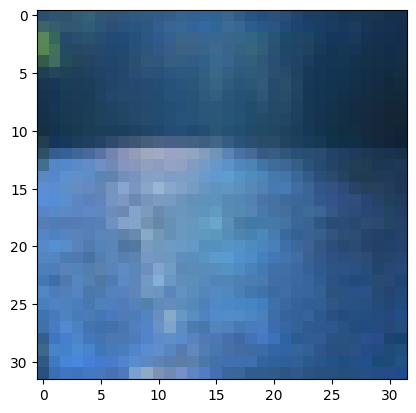

For the above image top predictions are:

   aquarium_fish: 31.84%
             ray: 4.24%
           trout: 3.92%
        flatfish: 3.86%
             sea: 3.52%
And the correct label is: sea
----------------------------------------------------------------


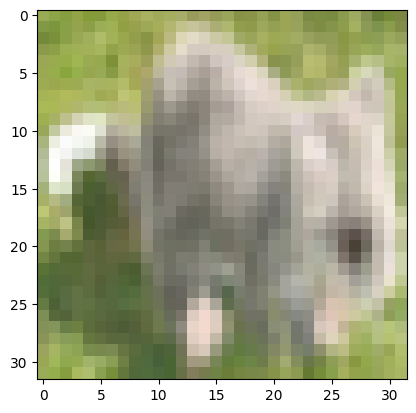

For the above image top predictions are:

          cattle: 68.99%
        elephant: 7.74%
      lawn_mower: 4.77%
            bear: 2.80%
        kangaroo: 2.36%
And the correct label is: possum
----------------------------------------------------------------


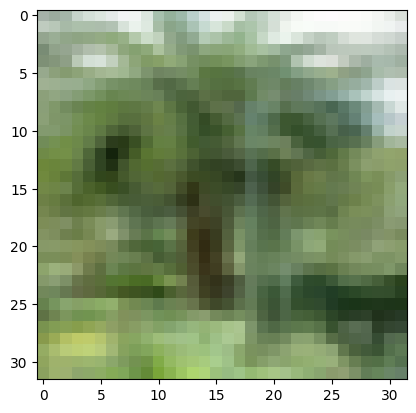

For the above image top predictions are:

       palm_tree: 88.33%
       pine_tree: 2.67%
      lawn_mower: 1.67%
     willow_tree: 1.28%
           plain: 0.81%
And the correct label is: palm_tree
----------------------------------------------------------------


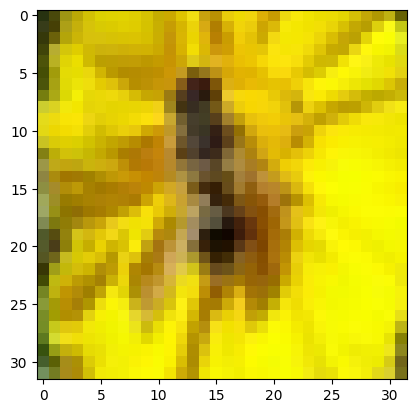

For the above image top predictions are:

             bee: 81.30%
       sunflower: 11.90%
          beetle: 1.61%
       butterfly: 0.75%
      lawn_mower: 0.66%
And the correct label is: bee
----------------------------------------------------------------


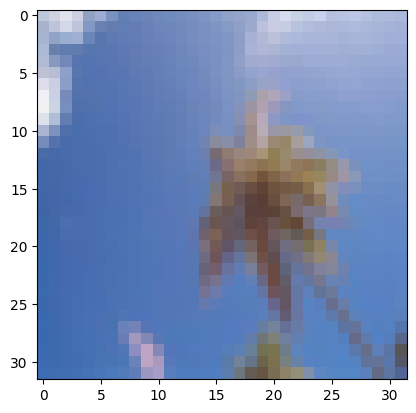

For the above image top predictions are:

       palm_tree: 75.68%
       pine_tree: 2.98%
           plain: 2.84%
           cloud: 1.70%
        dinosaur: 1.41%
And the correct label is: palm_tree
----------------------------------------------------------------


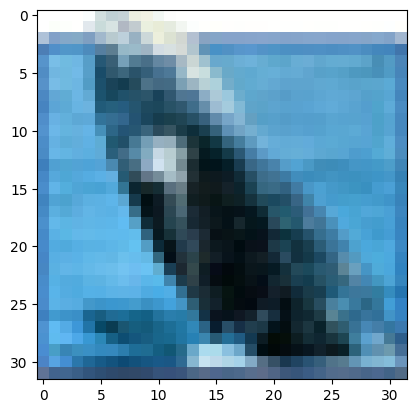

For the above image top predictions are:

           whale: 77.49%
   aquarium_fish: 11.52%
         dolphin: 5.70%
           shark: 1.20%
             sea: 0.96%
And the correct label is: whale
----------------------------------------------------------------


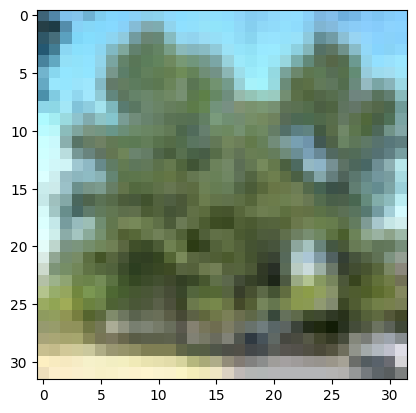

For the above image top predictions are:

       pine_tree: 58.84%
        oak_tree: 11.59%
       palm_tree: 7.25%
      maple_tree: 6.92%
     willow_tree: 4.01%
And the correct label is: oak_tree
----------------------------------------------------------------


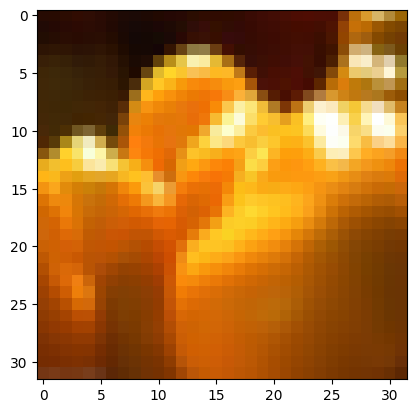

For the above image top predictions are:

          orange: 21.83%
           tulip: 9.69%
    sweet_pepper: 7.90%
       sunflower: 5.10%
            lamp: 4.30%
And the correct label is: sweet_pepper
----------------------------------------------------------------


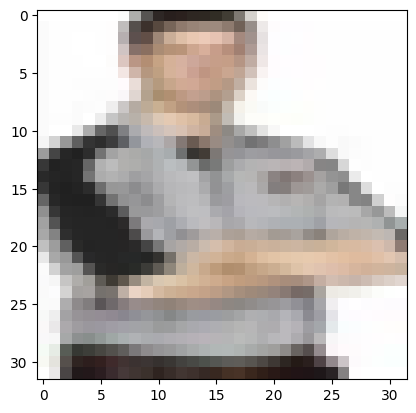

For the above image top predictions are:

      lawn_mower: 19.92%
             boy: 11.35%
             man: 10.83%
        keyboard: 3.80%
           plain: 3.46%
And the correct label is: man
----------------------------------------------------------------


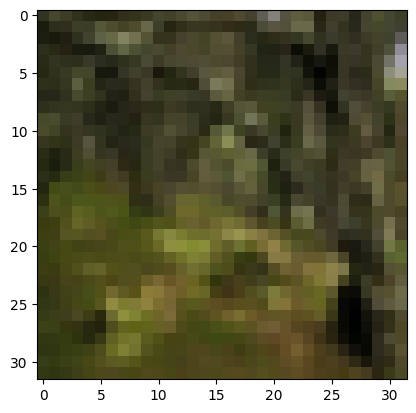

For the above image top predictions are:

        oak_tree: 39.79%
       pine_tree: 15.10%
      maple_tree: 9.16%
     willow_tree: 8.61%
          forest: 7.71%
And the correct label is: forest
----------------------------------------------------------------


In [23]:
for index in random_image_indexes:
    image, class_id = cifar100[index]
    plt.imshow(image)
    plt.show()
    image_input = preprocess(image).unsqueeze(0).to(device)
    text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in cifar100.classes]).to(device)

    with torch.no_grad():
        image_features = model.encode_image(image_input)
        text_features = model.encode_text(text_inputs)

    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)
    similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
    values, indices = similarity[0].topk(5)

    print("For the above image top predictions are:\n")
    for value, index in zip(values, indices):
        print(f"{cifar100.classes[index]:>16s}: {100 * value.item():.2f}%")
    print(f"And the correct label is: {cifar100_mapping[class_id]}")
    print(64*"-")